In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import explicit_versioned_prov

# Versioned-PROV

## Names, literals, and constants

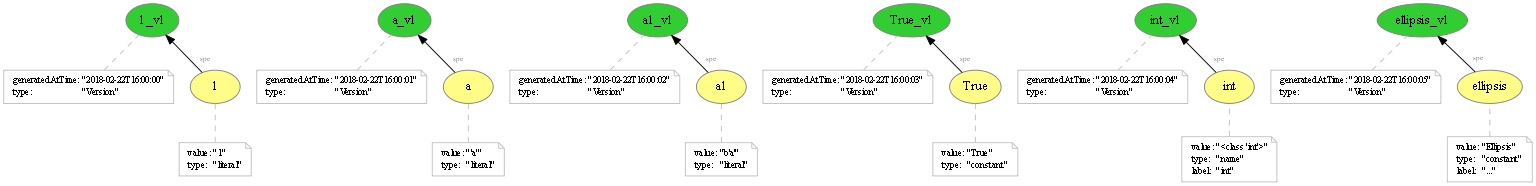

In [2]:
%%provn -o ../explicit_versioned/names -e png svg pdf provn
entity(1, [value="1", type="literal"])
entity(1_v1, [generatedAtTime="2018-02-22T16:00:00", type="Version"])
specializationOf(1, 1_v1)

entity(a, [value="'a'", type="literal"])
entity(a_v1, [generatedAtTime="2018-02-22T16:00:01", type="Version"])
specializationOf(a, a_v1)

entity(a1, [value="b'a'", type="literal"])
entity(a1_v1, [generatedAtTime="2018-02-22T16:00:02", type="Version"])
specializationOf(a1, a1_v1)

entity(True, [value="True", type="constant"])
entity(True_v1, [generatedAtTime="2018-02-22T16:00:03", type="Version"])
specializationOf(True, True_v1)

entity(int, [value="<class 'int'>", type="name", label="int"])
entity(int_v1, [generatedAtTime="2018-02-22T16:00:04", type="Version"])
specializationOf(int, int_v1)

entity(ellipsis, [value="Ellipsis", type="constant", label="..."])
entity(ellipsis_v1, [generatedAtTime="2018-02-22T16:00:05", type="Version"])
specializationOf(ellipsis, ellipsis_v1)

## Assignment

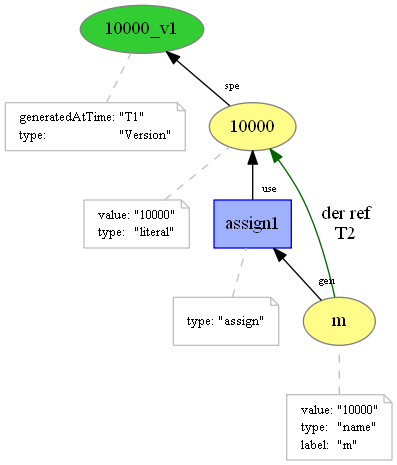

In [3]:
%%provn -o ../explicit_versioned/assign -e png svg pdf provn
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)

entity(m, [value="10000", type="name", label="m"])

activity(assign1, [type="assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
referenceDerivedFrom(m, 10000, assign1, g1, u1, T2)

## Operation

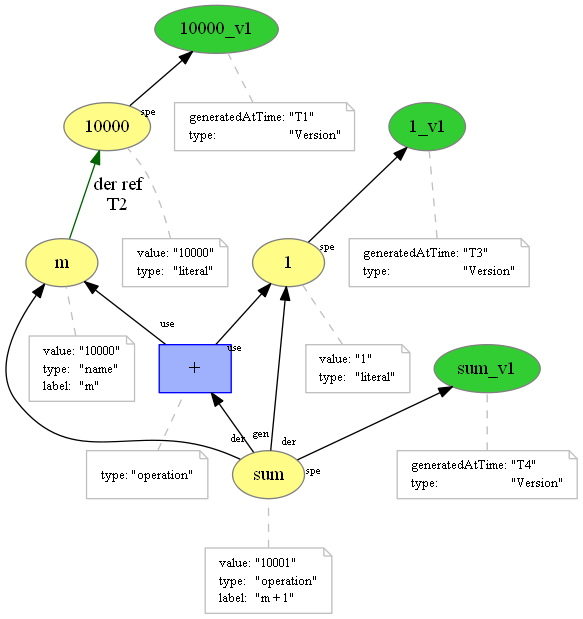

In [4]:
%%provn -o ../explicit_versioned/operation -e png svg pdf provn
// previous
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="name", label="m"])
referenceDerivedFrom(m, 10000, assign1, g1, u1, T2)

// new
entity(1, [value="1", type="literal"])
entity(1_v1, [generatedAtTime="T3", type="Version"])
specializationOf(1, 1_v1)

entity(sum, [value="10001", type="operation", label="m + 1"])
entity(sum_v1, [generatedAtTime="T4", type="Version"])
specializationOf(sum, sum_v1)

activity(+, [type="operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

## List definition

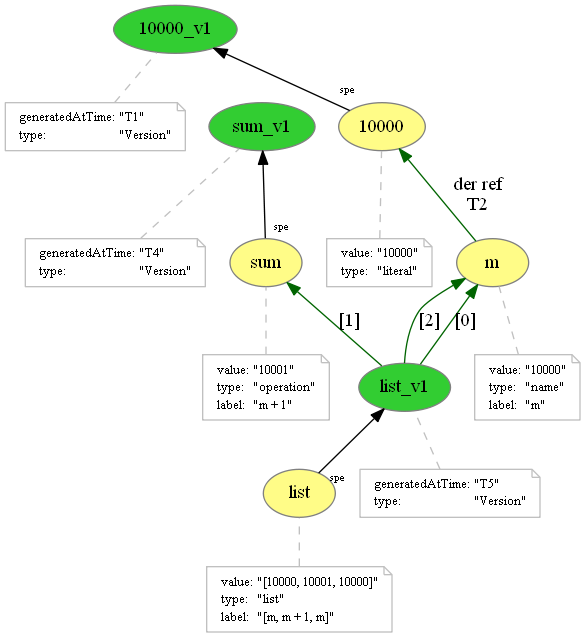

In [5]:
%%provn -o ../explicit_versioned/list -e png svg pdf provn
// previous
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="name", label="m"])
referenceDerivedFrom(m, 10000, -, -, -, T2)

entity(sum, [value="10001", type="operation", label="m + 1"])
entity(sum_v1, [generatedAtTime="T4", type="Version"])
specializationOf(sum, sum_v1)

// new
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list_v1, [generatedAtTime="T5", type="Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

## Assignment of list definition

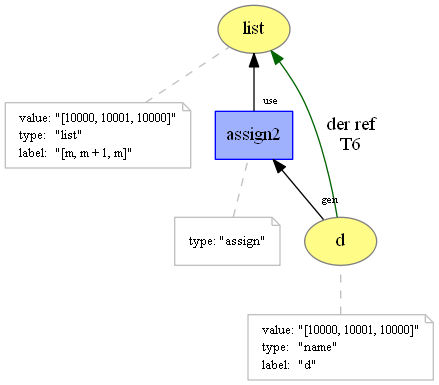

In [6]:
%%provn -o ../explicit_versioned/list_assign -e png svg pdf provn
// previous
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])

// new entities
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

activity(assign2, [type="assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
referenceDerivedFrom(d, list, assign2, g7, u7, T6)

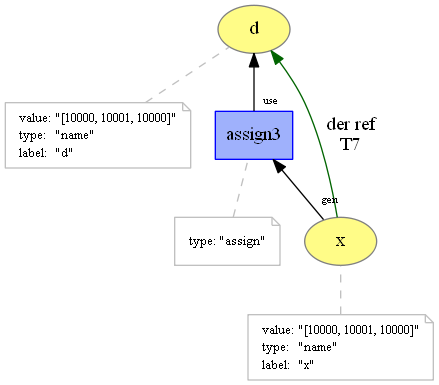

In [7]:
%%provn -o ../explicit_versioned/list_assign2 -e png svg pdf provn
// old entities from previous figure
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

// new entities
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
referenceDerivedFrom(x, d, assign3, g8, u8, T7)

## Function call

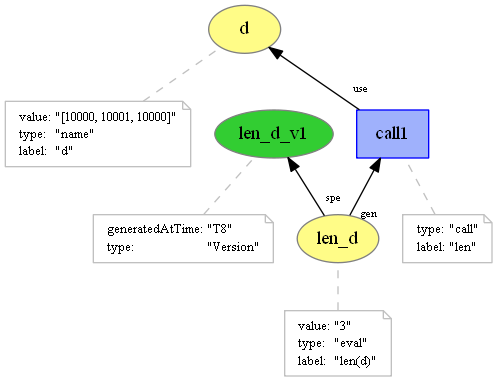

In [8]:
%%provn -o ../explicit_versioned/call -e png svg pdf provn
// previous
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

// new
entity(len_d, [value="3", type="eval", label="len(d)"])
entity(len_d_v1, [generatedAtTime="T8", type="Version"])
specializationOf(len_d, len_d_v1)

activity(call1, [type="call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

## Access to part of structure

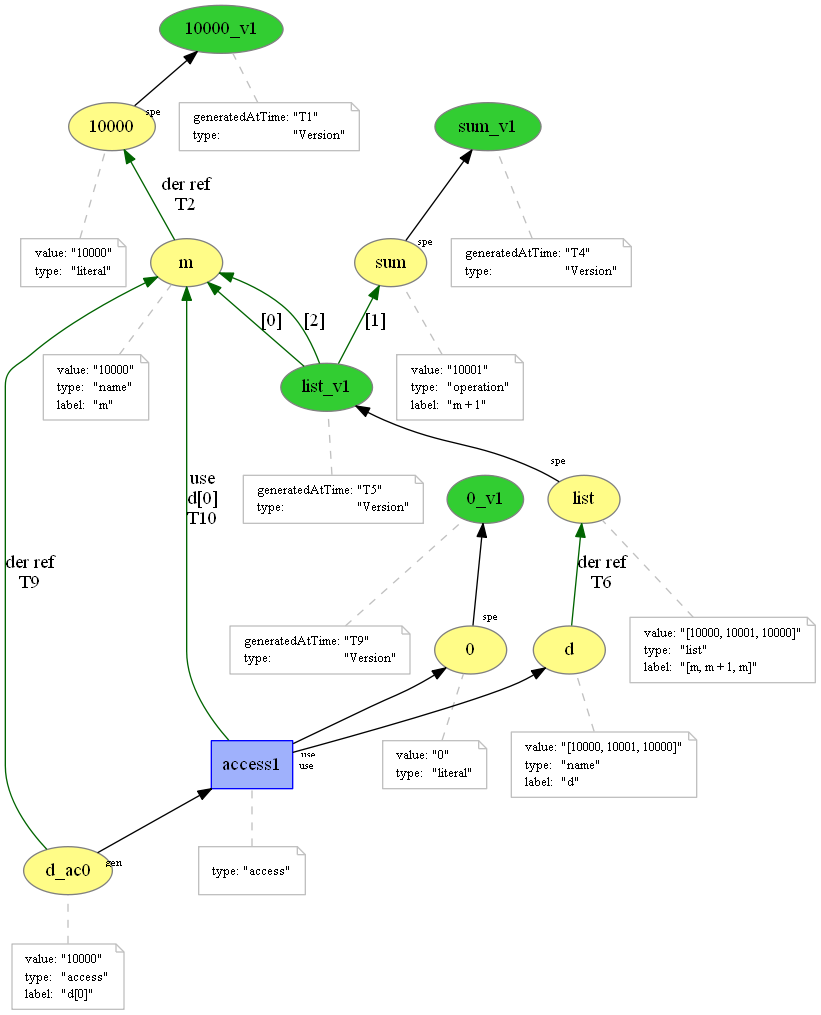

In [9]:
%%provn -o ../explicit_versioned/access -e png svg pdf provn
//previous
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="name", label="m"])
referenceDerivedFrom(m, 10000, -, -, -, T2)

entity(sum, [value="10001", type="operation", label="m + 1"])
entity(sum_v1, [generatedAtTime="T4", type="Version"])
specializationOf(sum, sum_v1)

entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list_v1, [generatedAtTime="T5", type="Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])
referenceDerivedFrom(d, list, -, -, -, T6)


//access
entity(0, [value="0", type="literal"])
entity(0_v1, [generatedAtTime="T9", type="Version"])
specializationOf(0, 0_v1)

entity(d_ac0, [value="10000", type="access", label="d[0]"])


activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
usedPart(u9; access1, m, "0", d, T10)
wasGeneratedBy(g9; d_ac0, access1, -)
referenceDerivedFrom(d_ac0, m, access1, g9, u9, T9)

## Assignment to part of structure

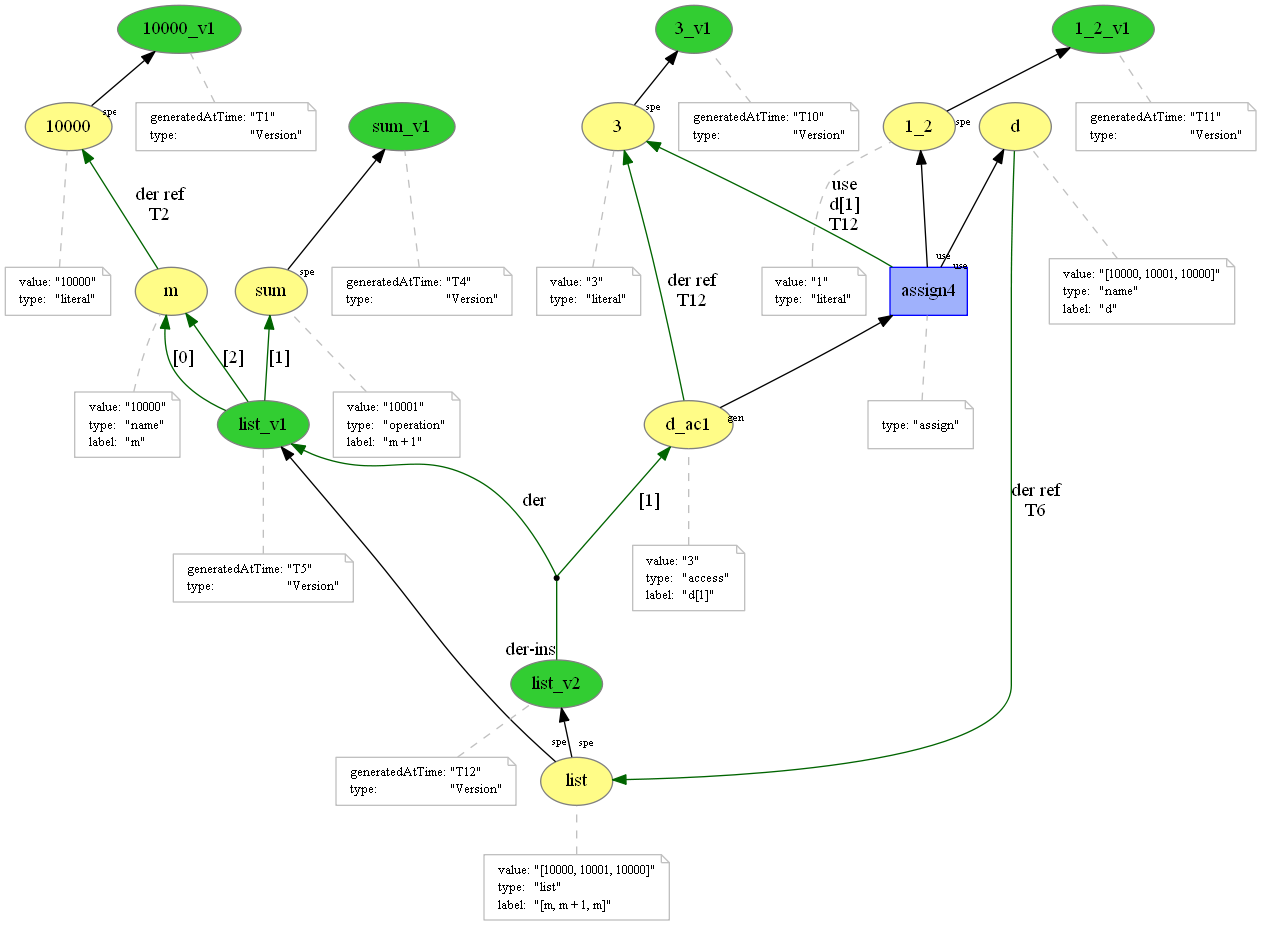

In [10]:
%%provn -o ../explicit_versioned/part_assign -e png svg pdf provn
//previous
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)
entity(m, [value="10000", type="name", label="m"])
referenceDerivedFrom(m, 10000, -, -, -, T2)

entity(sum, [value="10001", type="operation", label="m + 1"])
entity(sum_v1, [generatedAtTime="T4", type="Version"])
specializationOf(sum, sum_v1)

entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list_v1, [generatedAtTime="T5", type="Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])
referenceDerivedFrom(d, list, -, -, -, T6)


//part assign
entity(3, [value="3", type="literal"])
entity(3_v1, [generatedAtTime="T10", type="Version"])
specializationOf(3, 3_v1)

entity(1_2, [value="1", type="literal"])
entity(1_2_v1, [generatedAtTime="T11", type="Version"])
specializationOf(1_2, 1_2_v1)

entity(d_ac1, [value="3", type="access", label="d[1]"])

entity(list_v2, [generatedAtTime="T12", type="Version"])
derivedByInsertionFrom(list_v2, list_v1, {("1", d_ac1)})
specializationOf(list, list_v2)

activity(assign4, [type="assign"])
used(assign4, d, -)
used(assign4, 1_2, -)
usedPart(u10; assign4, 3, "1", d, T12)
wasGeneratedBy(g10; d_ac1, assign4, -)
referenceDerivedFrom(d_ac1, 3, assign4, g10, u10, T12)

## Full

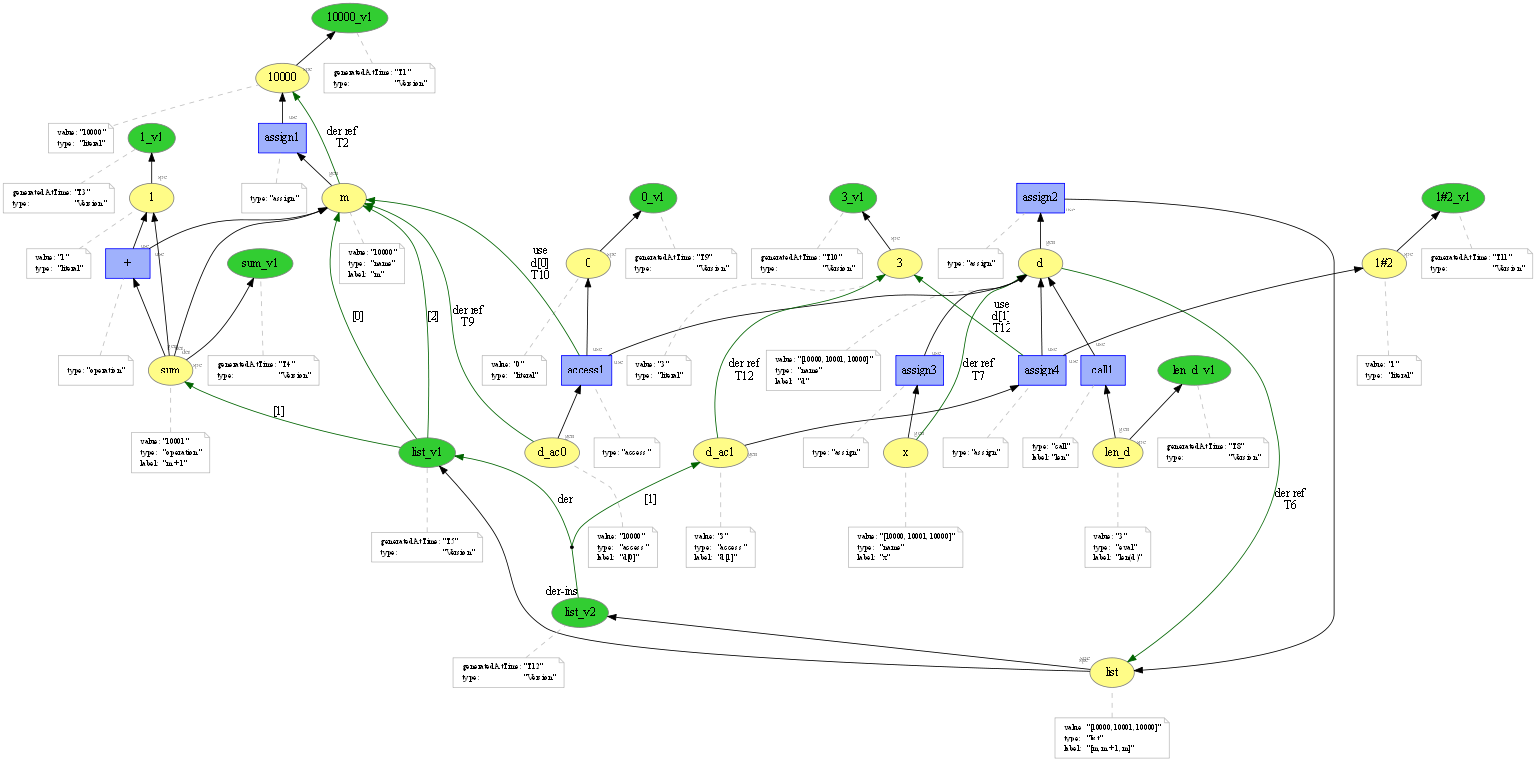

In [11]:
%%provn -o ../explicit_versioned/full -e png svg pdf provn
// assignment
entity(10000, [value="10000", type="literal"])
entity(10000_v1, [generatedAtTime="T1", type="Version"])
specializationOf(10000, 10000_v1)

entity(m, [value="10000", type="name", label="m"])

activity(assign1, [type="assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
referenceDerivedFrom(m, 10000, assign1, g1, u1, T2)

// operation
entity(1, [value="1", type="literal"])
entity(1_v1, [generatedAtTime="T3", type="Version"])
specializationOf(1, 1_v1)

entity(sum, [value="10001", type="operation", label="m + 1"])
entity(sum_v1, [generatedAtTime="T4", type="Version"])
specializationOf(sum, sum_v1)

activity(+, [type="operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

// list def
entity(list, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list_v1, [generatedAtTime="T5", type="Version"])
specializationOf(list, list_v1)
hadDictionaryMember(list_v1, m, "0")
hadDictionaryMember(list_v1, sum, "1")
hadDictionaryMember(list_v1, m, "2")

// list assign
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

activity(assign2, [type="assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
referenceDerivedFrom(d, list, assign2, g7, u7, T6)

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
referenceDerivedFrom(x, d, assign3, g8, u8, T7)

// call
entity(len_d, [value="3", type="eval", label="len(d)"])
entity(len_d_v1, [generatedAtTime="T8", type="Version"])
specializationOf(len_d, len_d_v1)

activity(call1, [type="call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

// part access
entity(0, [value="0", type="literal"])
entity(0_v1, [generatedAtTime="T9", type="Version"])
specializationOf(0, 0_v1)

entity(d_ac0, [value="10000", type="access", label="d[0]"])

activity(access1, [type="access"])
used(access1, d, -)
used(access1, 0, -)
usedPart(u9; access1, m, "0", d, T10)
wasGeneratedBy(g9; d_ac0, access1, -)
referenceDerivedFrom(d_ac0, m, access1, g9, u9, T9)

// part assign
entity(3, [value="3", type="literal"])
entity(3_v1, [generatedAtTime="T10", type="Version"])
specializationOf(3, 3_v1)

entity(1#2, [value="1", type="literal"])
entity(1#2_v1, [generatedAtTime="T11", type="Version"])
specializationOf(1#2, 1#2_v1)

entity(d_ac1, [value="3", type="access", label="d[1]"])

entity(list_v2, [generatedAtTime="T12", type="Version"])
derivedByInsertionFrom(list_v2, list_v1, {("1", d_ac1)})
specializationOf(list, list_v2)

activity(assign4, [type="assign"])
used(assign4, d, -)
used(assign4, 1#2, -)
usedPart(u10; assign4, 3, "1", d, T12)
wasGeneratedBy(g10; d_ac1, assign4, -)
referenceDerivedFrom(d_ac1, 3, assign4, g10, u10, T12)